In [1]:
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
output_path = "Z://RR/Final/report_work/output/"
image_prefix = "Z://RR/FairFace/images/archive/"
def show_image(file_path):
	# full_path = file_prefix + '/'+file_path
	img = cv2.imread(file_path)[:,:,::-1]
	plt.imshow(img)
	plt.show()

In [3]:
FairFace_df = pd.read_csv(r"Z:\RR\FairFace\labels\fairface_label_full_allocated.csv")
train_df = FairFace_df[FairFace_df['Split'] == 'Train']
test_df = FairFace_df[FairFace_df['Split'] == 'Test']

len_train = len(train_df)
len_test = len(test_df)
print("Length of train {}\nLength of test {}".format(len_train,len_test))


Length of train 83043
Length of test 14655


In [4]:
train_df.head()

file    age  gender    race  Split
1  train/2.jpg  30-39  Female  Indian  Train
2  train/3.jpg  03-09  Female   Black  Train
3  train/4.jpg  20-29  Female  Indian  Train
4  train/5.jpg  20-29  Female  Indian  Train
5  train/6.jpg  20-29    Male   White  Train

In [5]:
train_df.race.value_counts()

White              15829
Latino_Hispanic    12739
Indian             11754
East Asian         11729
Black              11700
Southeast Asian    10424
Middle Eastern      8868
Name: race, dtype: int64

0


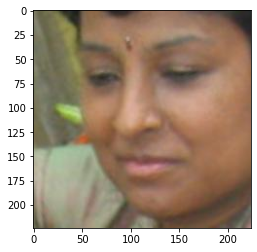

1


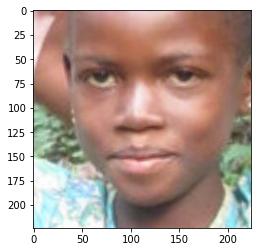

2


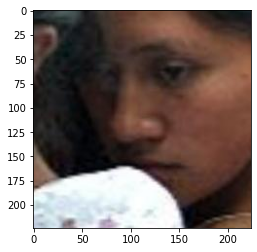

3


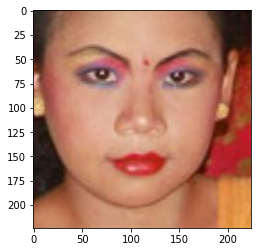

4


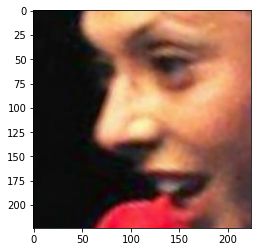

5


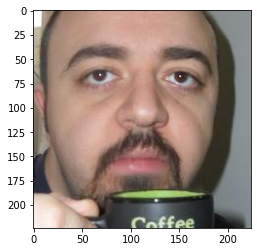

6


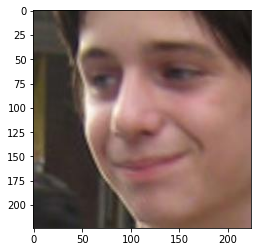

7


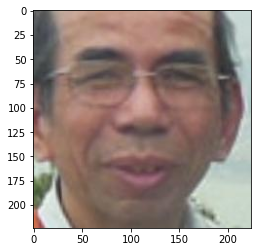

8


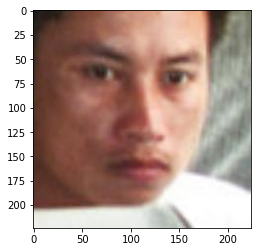

9


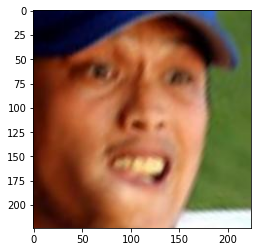

10


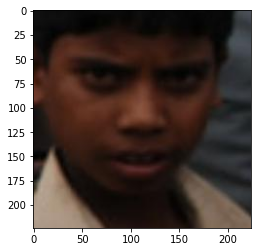

11


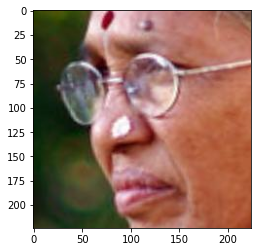

12


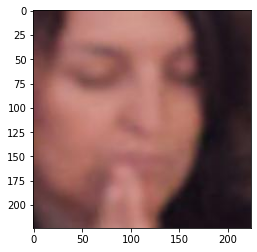

13


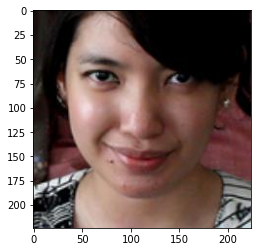

14


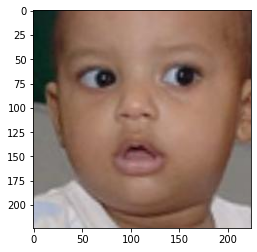

15


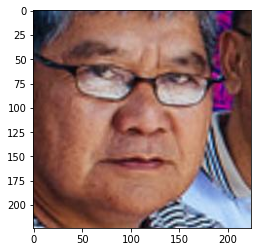

16


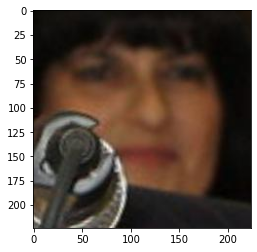

17


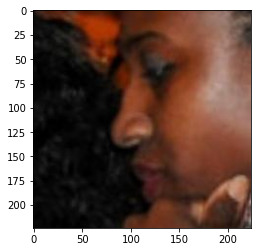

18


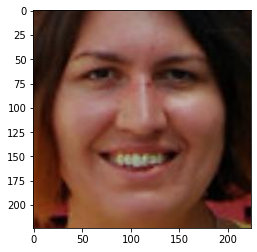

19


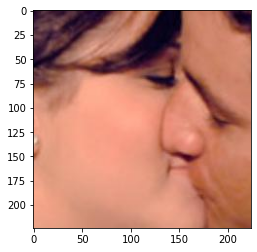

20


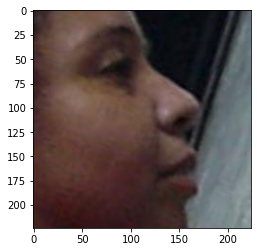

21


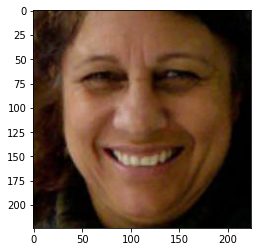

22


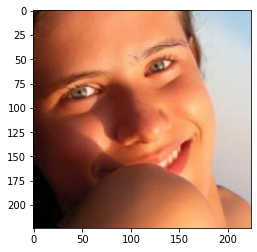

23


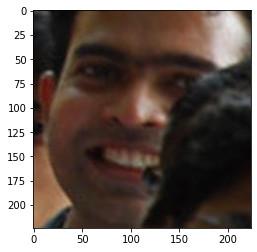

24


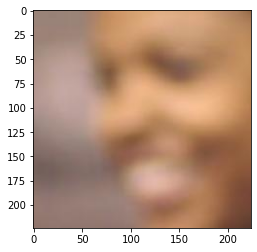

25


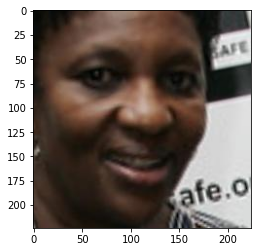

26


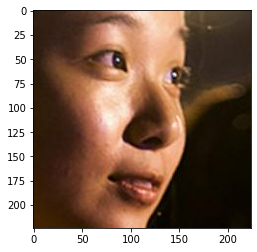

27


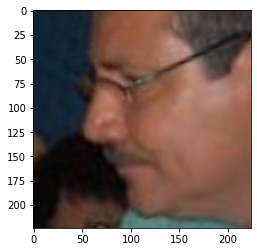

28


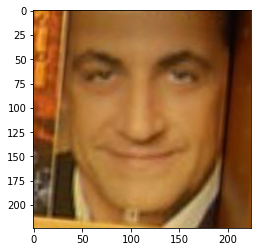

29


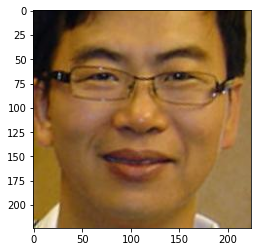

30


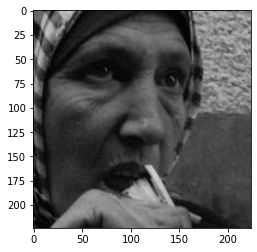

31


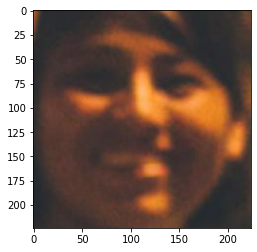

32


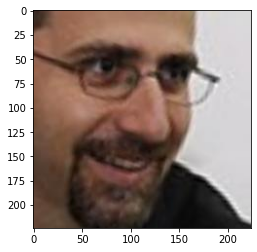

33


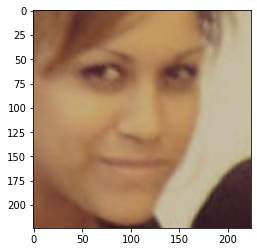

34


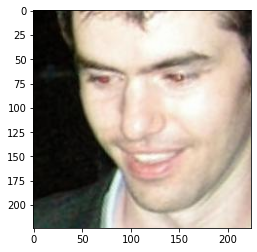

35


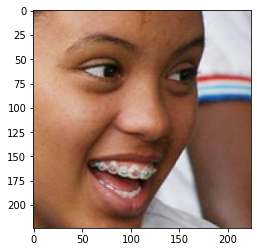

36


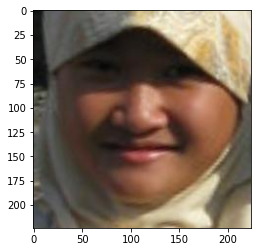

37


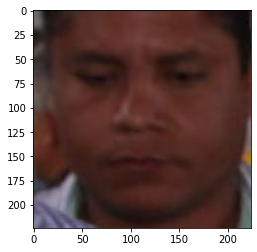

38


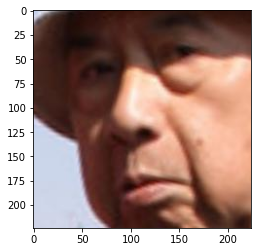

39


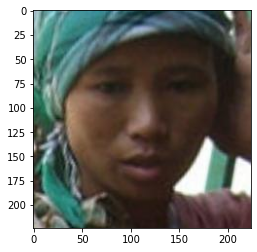

40


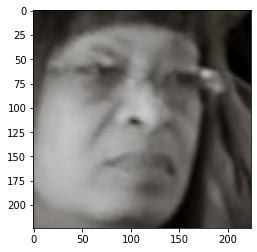

41


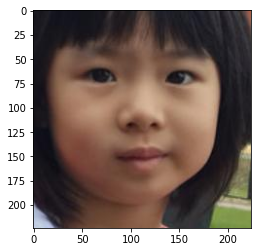

42


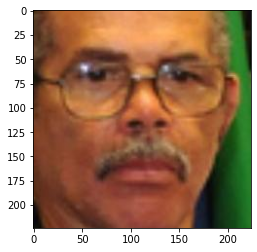

43


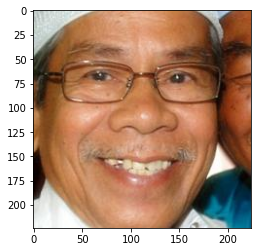

44


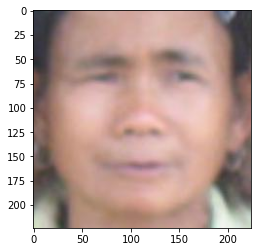

45


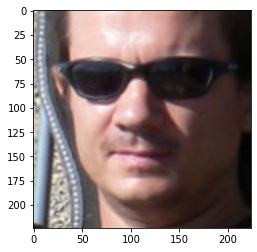

46


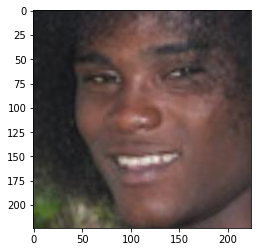

47


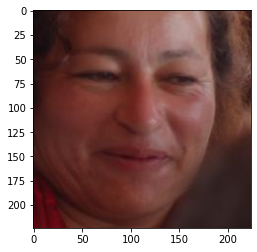

48


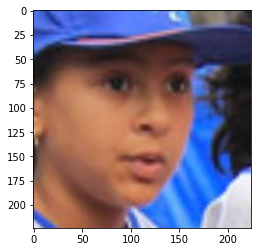

49


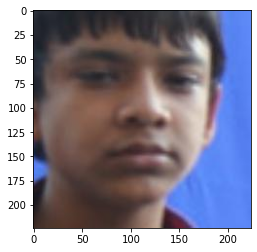

In [6]:
for i in range(50):
	record = train_df.iloc[i]
	print(i)
	show_image(os.path.join(image_prefix,record.file))
	plt.show()
	

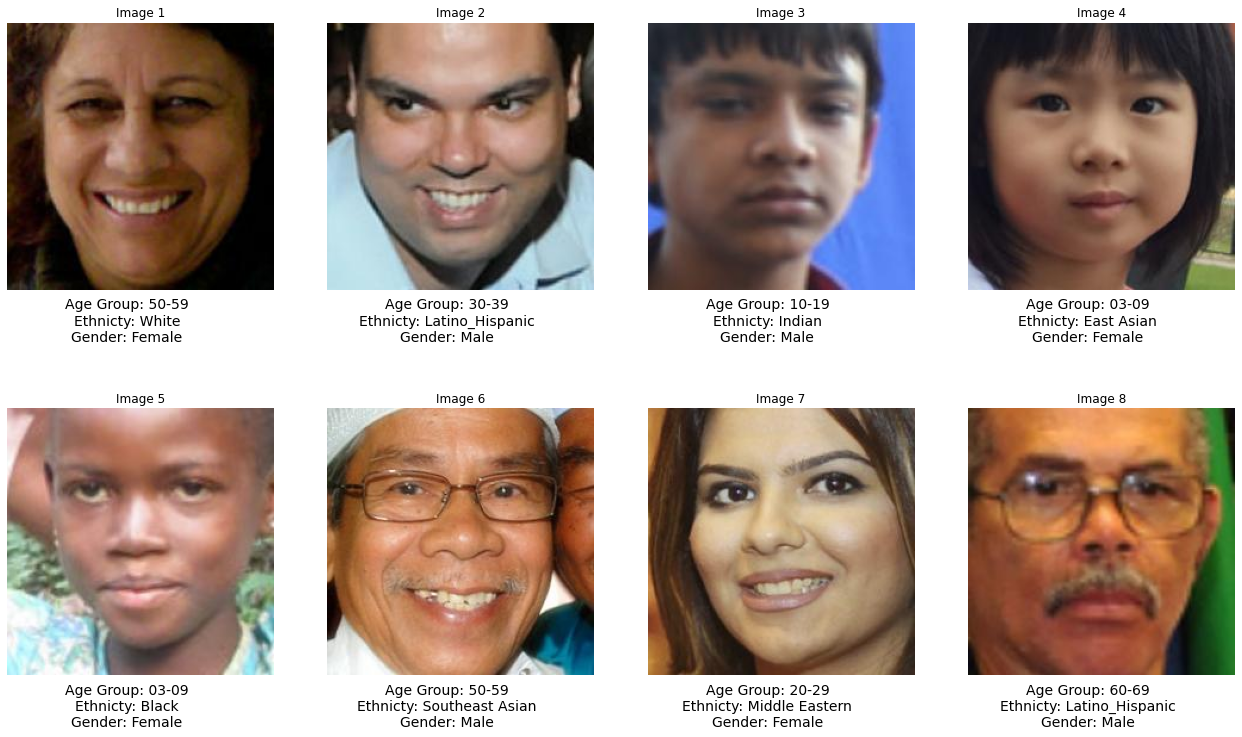

In [7]:
image_idx = [21,53,49,41,1,43,91,42]

fig = plt.figure(figsize=(22, 13),facecolor = 'white')

rows = 2
columns = 4
for i,idx in enumerate(image_idx):
	record = train_df.iloc[idx]
	fig.add_subplot(rows, columns, i+1)
	path = os.path.join(image_prefix,record.file)
 
	img = cv2.imread(path)[:,:,::-1]
	plt.imshow(img)
	plt.axis('off')
	plt.title("Image {}".format(i+1),color = 'black',fontsize=12)
	caption = F"Age Group: {record.age}\nEthnicty: {record.race}\nGender: {record.gender}"
	plt.text(100, 265, caption, wrap=True, horizontalalignment='center',backgroundcolor = 'white',fontsize=14)

plt.savefig(os.path.join(output_path,'example_images.jpg'))

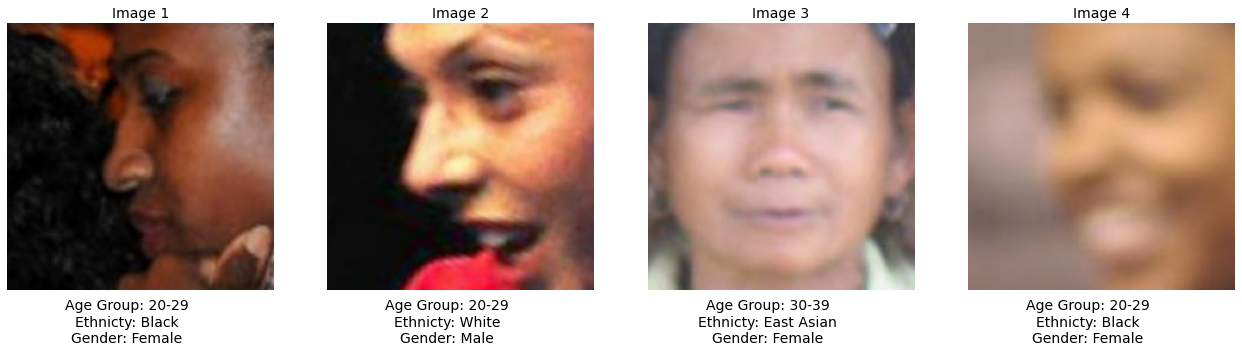

In [8]:
image_idx = [17,4,44,24]

fig = plt.figure(figsize=(22, 13))

rows = 2
columns = 4
for i,idx in enumerate(image_idx):
	record = train_df.iloc[idx]
	fig.add_subplot(rows, columns, i+1)
	path = os.path.join(image_prefix,record.file)
 
	img = cv2.imread(path)[:,:,::-1]
	plt.imshow(img)
	plt.axis('off')
	plt.title("Image {}".format(i+1),color = 'black',fontsize=14)
	caption = F"Age Group: {record.age}\nEthnicty: {record.race}\nGender: {record.gender}"
	plt.text(100, 265, caption, wrap=True, horizontalalignment='center',backgroundcolor = 'white',fontsize=14)

plt.savefig(os.path.join(output_path,'example_bad_quality_images.jpg'))

In [9]:
age_dist = train_df.age.value_counts().reset_index(name = "count").rename(columns={"index":"age"})
race_dist = train_df.race.value_counts().reset_index(name = "count").rename(columns={"index":"race"})
gender_dist = train_df.gender.value_counts().reset_index(name = "count").rename(columns={"index":"gender"})

age_dist.sort_values(by = ['age'],inplace=True)

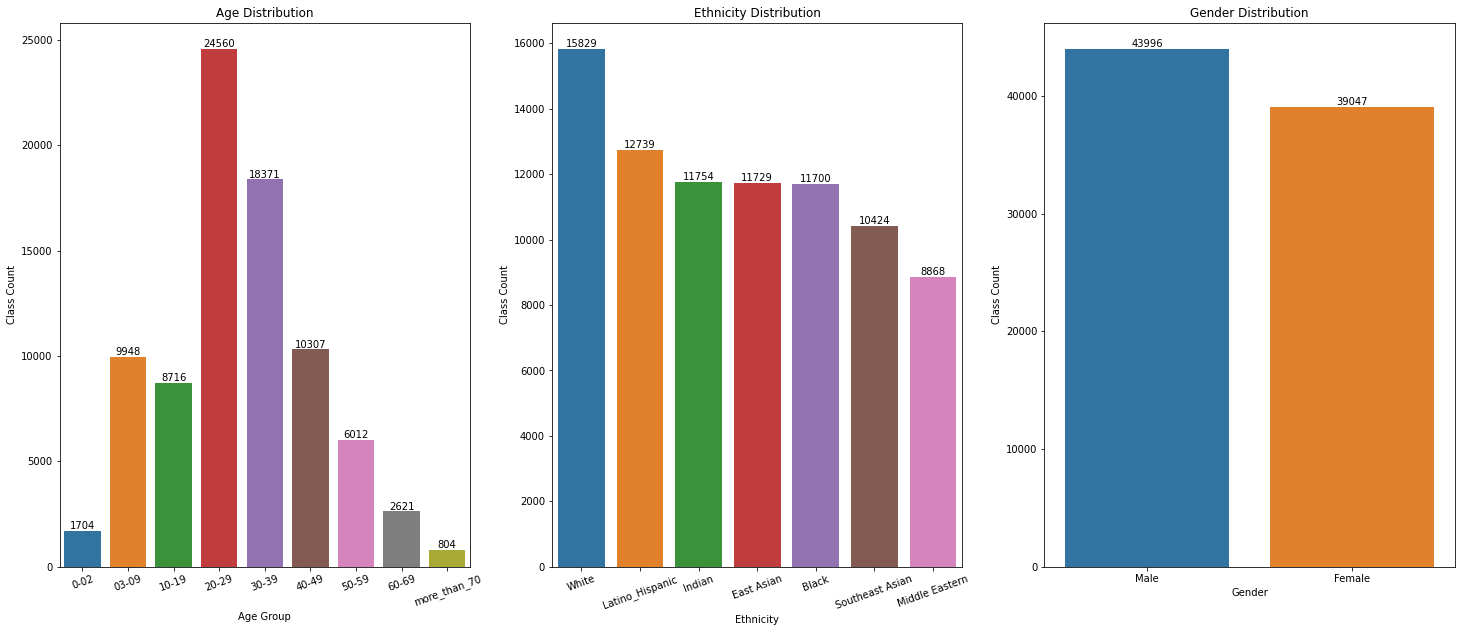

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(25, 10))
ax = axs.ravel()

plot = sns.barplot(x = age_dist.iloc[:, 0], y = age_dist.iloc[:, 1],ax=ax[0])

ax[0].set_title(F"Age Distribution")
ax[0].set_ylabel('Class Count')
ax[0].set_xlabel('Age Group')
plot.bar_label(plot.containers[0])
_ = ax[0].set_xticklabels(age_dist.iloc[:, 0], rotation=20)

plot = sns.barplot(x = race_dist.iloc[:, 0], y = race_dist.iloc[:, 1],ax=ax[1])
ax[1].set_title(F"Ethnicity Distribution")
ax[1].set_ylabel('Class Count')
ax[1].set_xlabel('Ethnicity')
plot.bar_label(plot.containers[0])
_ = ax[1].set_xticklabels(race_dist.iloc[:, 0], rotation=20)

plot = sns.barplot(x = gender_dist.iloc[:, 0], y = gender_dist.iloc[:, 1],ax=ax[2])
ax[2].set_title(F"Gender Distribution")
ax[2].set_ylabel('Class Count')
ax[2].set_xlabel('Gender')
_ = plot.bar_label(plot.containers[0])

plt.savefig(os.path.join(output_path,'train_overall_dist.jpg'))

In [11]:
race_dist_ratio = race_dist.iloc[:, 1]/race_dist.iloc[:, 1].sum()
race_dist_ratio

0    0.190612
1    0.153402
2    0.141541
3    0.141240
4    0.140891
5    0.125525
6    0.106788
Name: count, dtype: float64

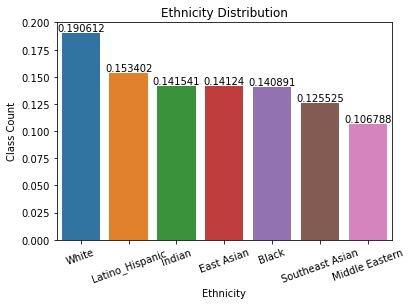

In [12]:

plot = sns.barplot(x = race_dist.iloc[:, 0], y = race_dist_ratio)

plot.set_title(F"Ethnicity Distribution")
plot.set_ylabel('Class Count')
plot.set_xlabel('Ethnicity')
plot.bar_label(plot.containers[0])
_ = plot.set_xticklabels(race_dist.iloc[:, 0], rotation=20)

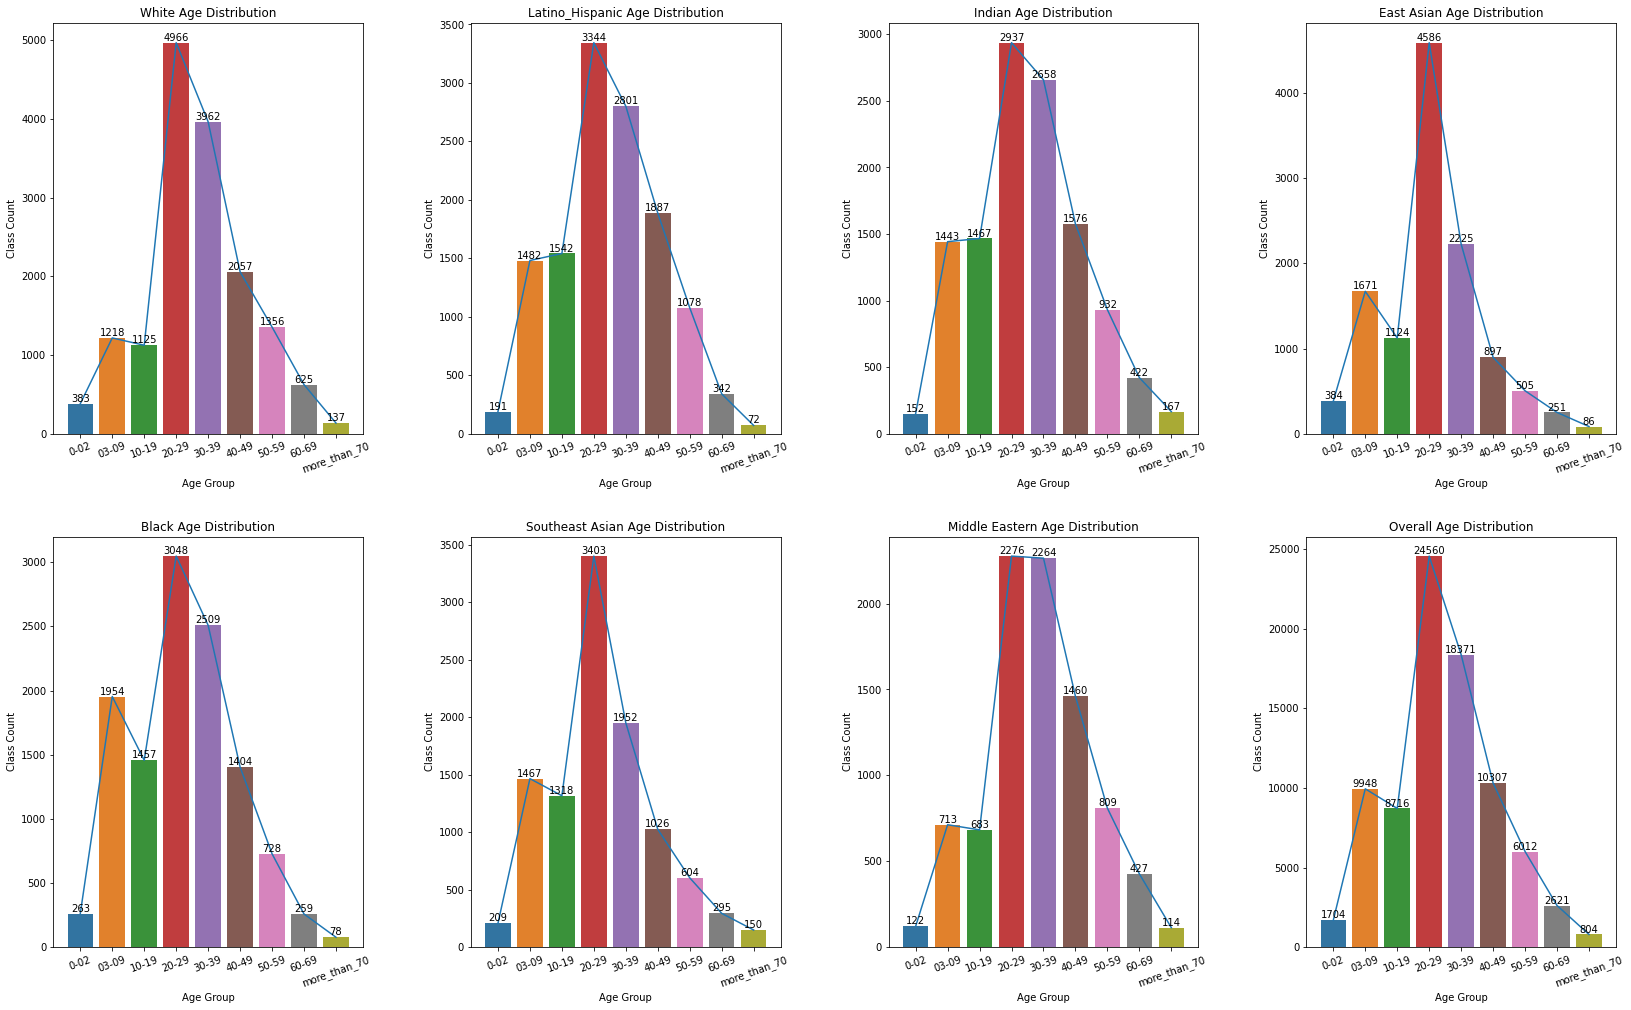

In [13]:
  
fig, axs = plt.subplots(2, 4, figsize=(28, 17))
ax = axs.ravel()
plt.subplots_adjust(hspace=0.25,wspace=0.35)


for i,r in enumerate(race_dist.iloc[:, 0]):
	temp_df = train_df[train_df['race'] == r]
	age_dist_r = temp_df.age.value_counts().reset_index(name = "count").rename(columns={"index":"age"})
	age_dist_r.sort_values(by = ['age'],inplace=True)

	plot = sns.barplot(x = age_dist_r.iloc[:, 0], y = age_dist_r.iloc[:, 1],ax=ax[i])
	plot = sns.lineplot(x = age_dist_r.iloc[:, 0], y = age_dist_r.iloc[:, 1],ax=ax[i])
 
	ax[i].set_title(F"{r} Age Distribution")
	ax[i].set_ylabel('Class Count')
	ax[i].set_xlabel('Age Group')
	plot.bar_label(plot.containers[0])
	_ = ax[i].set_xticklabels(age_dist_r.iloc[:, 0], rotation=20)
 
	
plot = sns.barplot(x = age_dist.iloc[:, 0], y = age_dist.iloc[:, 1],ax=ax[7])
plot = sns.lineplot(x = age_dist.iloc[:, 0], y = age_dist.iloc[:, 1],ax=ax[7])

ax[7].set_title(F"Overall Age Distribution")
ax[7].set_ylabel('Class Count')
ax[7].set_xlabel('Age Group')
plot.bar_label(plot.containers[0])
_ = ax[7].set_xticklabels(age_dist_r.iloc[:, 0], rotation=20)

plt.savefig(os.path.join(output_path,'train_eth_age_dist.jpg'))

 

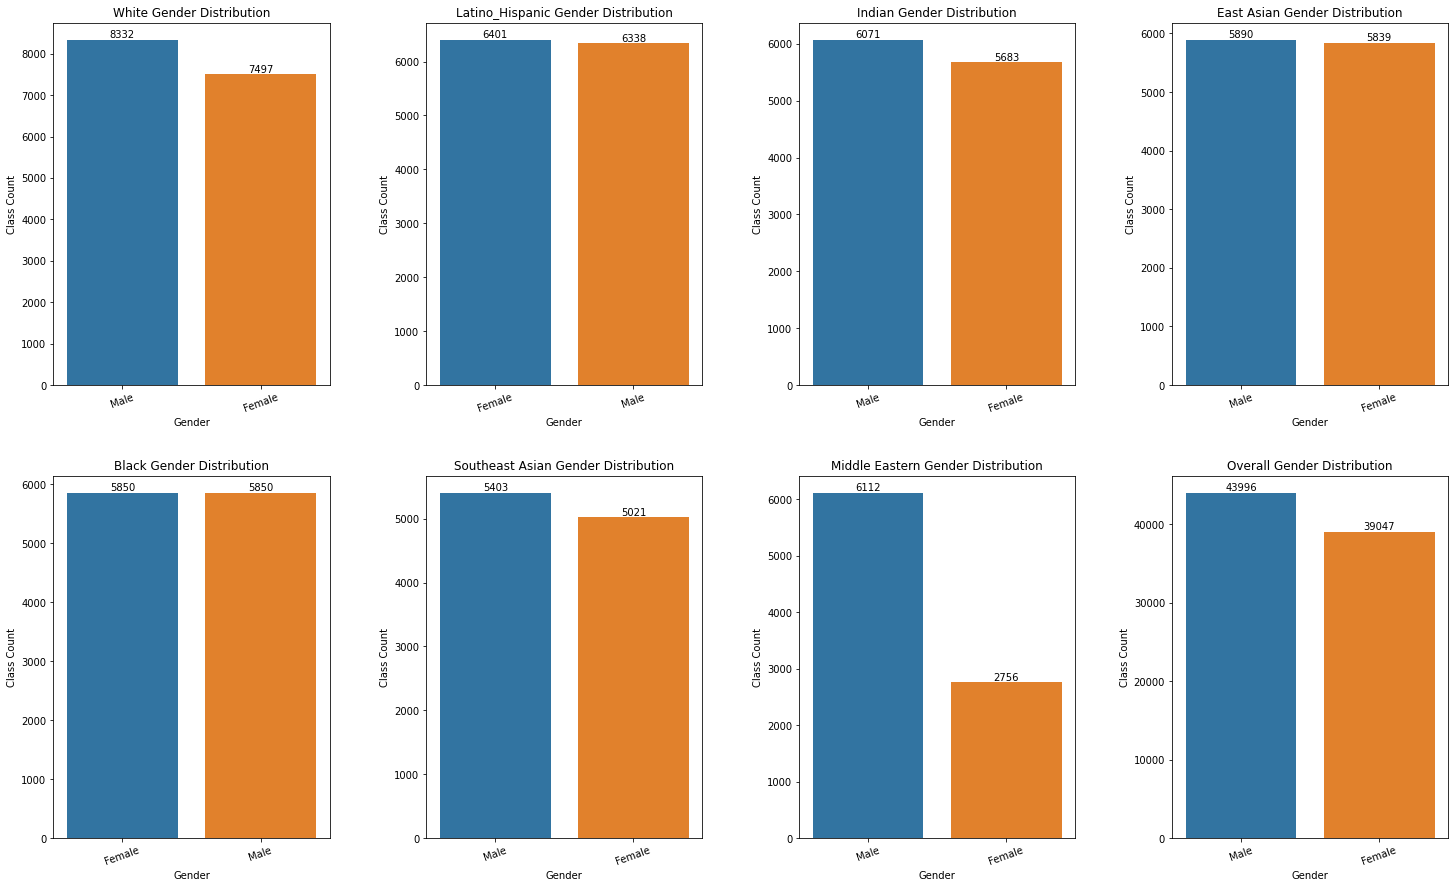

In [14]:
  
fig, axs = plt.subplots(2, 4, figsize=(25, 15))
ax = axs.ravel()
plt.subplots_adjust(hspace=0.25,wspace=0.35)


for i,r in enumerate(race_dist.iloc[:, 0]):
	temp_df = train_df[train_df['race'] == r]
	gender_dist_r = temp_df.gender.value_counts().reset_index(name = "count").rename(columns={"index":"gender"})

	plot = sns.barplot(x = gender_dist_r.iloc[:, 0], y = gender_dist_r.iloc[:, 1],ax=ax[i])
 
	ax[i].set_title(F"{r} Gender Distribution")
	ax[i].set_ylabel('Class Count')
	ax[i].set_xlabel('Gender')
	plot.bar_label(plot.containers[0])
	_ = ax[i].set_xticklabels(gender_dist_r.iloc[:, 0], rotation=20)
 
	
plot = sns.barplot(x = gender_dist.iloc[:, 0], y = gender_dist.iloc[:, 1],ax=ax[7])

ax[7].set_title(F"Overall Gender Distribution")
ax[7].set_ylabel('Class Count')
ax[7].set_xlabel('Gender')
plot.bar_label(plot.containers[0])
_ = ax[7].set_xticklabels(gender_dist_r.iloc[:, 0], rotation=20)

plt.savefig(os.path.join(output_path,'train_eth_gender_dist.jpg'))

Data Splits are done here

In [19]:
len(FairFace_df)

97698